<img SRC='img01.png' />
<center><h1 Style='color:#DC143C'>Analisis de Datos</h1></center>
<center><h3>Universidad Castro Carazo</h3></center>
<center><h6>2C - 2022</h6></center>
</br>
</br>
<p Style='text-align: justify'>Este notebook contiene el analisis de los datos de los vehiculos a la venta por parte de la empresa PK2 Ltda, esta empresa se encuentra interesada en responder una pregunta de negocio particular:

Como se pueden incrementar las ventas de autos de segunda mano?

Para esto, se realiza un analisis del conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento sobre las distribuciones de sus lotes de venta, los autos con mayor precio, o caracteristicas de los autos, esto para dotar de insumos suficientes a la toma de decisiones.</p>
</br>
</br>
<a href='https://www.google.com/'>Fuente de datos para el analisis</a>

<h2 Style='color:#8B0000'>1. Carga y estandarizacion del set de datos</h2> 
<p> Que se hace en esta etapa?</p>
<ol>
    <li>Importar las librerias necesarias</li>
    <li>Importar el o los set de datos</li>
    <li>Revisar los encabezados de los DataFrames</li>
    <li>Si, solo si, tenemos mas de 1 set de datos - Unir los set de datos en un unico DataFrame</li>
</ol>

<h3 Style='color:#8B0000'>1.1 Importar las librerias</h3> 

In [1]:
import pandas as pd             #Para el manejo de DataFrame.
import numpy as np              #Para el manejo de estructura de datos.
import matplotlib.pyplot as plt #Para el manejo de graficos.

<h3 Style='color:#8B0000'>1.2 Importar el set de datos</h3> 

In [2]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
"style", "wheels", "engine", "base", "length", "width", "heingt",
"curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
"compression", "horsepower", "peak", "City", "Higway", "price"]

df_1er_autos = pd.read_csv('autos.csv', names=cols)
df_2do_autos = pd.read_csv('Autos1.csv', names=cols)

In [3]:
df_1er_autos.shape #Permite conocer el tamano del DataFrame

(197, 26)

In [4]:
df_2do_autos.shape

(29, 26)

In [5]:
df_1er_autos.head(10) #Permite visualizar una cantidad determinada de los primeros datos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [6]:
df_1er_autos.tail(10) #Permite visualizar una cantidad determinada de los ultimos datos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
189,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [7]:
df_1er_autos.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h3 Style='color:#8B0000'>1.3 Revisar encabezados de los set de datos</h3> 

In [8]:
df_1er_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

In [9]:
df_1er_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [10]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

<h3 Style='color:#8B0000'>1.4 Unir Archivos en un solo DataFrame</h3> 

In [11]:
unionArchivos = [df_1er_autos, df_2do_autos] #Lista de DataFrames
dfAutos = pd.concat(unionArchivos)
dfAutos.shape

(226, 26)

In [12]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [13]:
dftem = dfAutos.iloc[:, 0:2]

In [14]:
dftem

,symboling,normalized
0,3,?
1,3,?
2,1,?
3,2,164
4,2,164
...,...,...
24,0,?
25,0,?
26,-2,103
27,-1,74


In [15]:
dftemp = dfAutos.iloc [[0,3,6,24],[0,5,6]] 

In [16]:
dftemp

,symboling,doors,style
0,3,two,convertible
3,2,four,sedan
6,1,four,sedan
24,1,four,hatchback


In [17]:
df_Autos = dfAutos

In [18]:
df_Autos.shape

(226, 26)

<h2 Style='color:#1E90FF'>2. Manejo de valores faltantes o perdidos</h2> 
<p> Que se hace en esta etapa?</p>
<ol>
    <li>Identificar como se muestran los valores faltantes (null, espacio vacio, ?) y estandarizarlos (NaN)</li>
    <li>Contar la cantidad de valores NaN ffaltantes por variable (columna)</li>
    <li>Analisis de imputacion (promedio / ML) para el caso de los numericos</li>
    <li>Analisis de imputacion (con el valor mas frecuente / ML) para el caso de los caracteres</li>
    <li>Eliminacion de filas o columnas con valores faltantes</li>
</ol>

<h3 Style='color:#1E90FF'>2.1 Identificar como se muestran los valores faltantes y estandarizarlos</h3> 

In [19]:
df_Autos.head(15)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [20]:
df_Autos.replace("?", np.nan, inplace = True)
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<h3 Style='color:#1E90FF'>2.2 Contar valores faltantes por columna</h3> 

In [21]:
valoresPerdidos = df_Autos.isnull()

In [22]:
valoresPerdidos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True     

<h3 Style='color:#1E90FF'>2.3 Imputar Datos Numericos</h3> 

<img SRC='img02.png' />

In [24]:
avg_normalized = df_Autos["normalized"].astype("float").mean(axis=0)
print("la media del normalized: ", avg_normalized)

la media del normalized:  122.28333333333333


In [25]:
df_Autos["normalized"].replace(np.nan, 122, inplace = True)
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<img SRC='img03.png' />

In [26]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [27]:
df_Autos["doors"].value_counts()

four    124
two     100
Name: doors, dtype: int64

In [28]:
df_Autos["doors"].value_counts().idxmax()

'four'

In [29]:
df_Autos["doors"].replace(np.nan, "four", inplace = True)

<img SRC='img04.png' />

In [30]:
avg_normalized = df_Autos["bore"].astype("float").mean(axis=0)
print("la media del bore: ", avg_normalized)

la media del bore:  3.319459459459461


In [31]:
df_Autos["bore"].replace(np.nan, 3.31, inplace = True)

<img SRC='img05.png' />

In [32]:
avg_normalized = df_Autos["stroke"].astype("float").mean(axis=0)
print("la media del stroke: ", avg_normalized)

la media del stroke:  3.2785135135135075


In [33]:
df_Autos["stroke"].replace(np.nan, 3.27, inplace = True)

<img SRC='img06.png' />

In [34]:
avg_normalized = df_Autos["horsepower"].astype("float").mean(axis=0)
print("la media del horsepower: ", avg_normalized)

la media del horsepower:  102.98214285714286


In [35]:
df_Autos["horsepower"].replace(np.nan, 102, inplace = True)

<img SRC='img07.png' />

In [36]:
avg_normalized = df_Autos["peak"].astype("float").mean(axis=0)
print("la media del peak: ", avg_normalized)

la media del peak:  5100.892857142857


In [37]:
df_Autos["peak"].replace(np.nan, 5100, inplace = True)

In [38]:
valoresPerdidos = df_Autos.isnull()
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    226
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    226
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    226
Name: bore, dtype: int64

stroke
False    226
Name: stroke, dtype: int64

compression
False   

<h3 Style='color:#1E90FF'>2.4 Eliminar filas con valores faltantes</h3> 

In [39]:
df_Autos.dropna(subset = ["price"], axis = 0, inplace = True) #Eliminar las columnas vacias
df_Autos.reset_index(drop = True, inplace = True) #Reiniciar el indice para rellenar los vacios eliminados

In [40]:
df_Autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
218,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
219,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
220,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [41]:
valoresPerdidos = df_Autos.isnull()
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    
    print("")

symboling
False    222
Name: symboling, dtype: int64

normalized
False    222
Name: normalized, dtype: int64

make
False    222
Name: make, dtype: int64

fuel
False    222
Name: fuel, dtype: int64

aspiration
False    222
Name: aspiration, dtype: int64

doors
False    222
Name: doors, dtype: int64

style
False    222
Name: style, dtype: int64

wheels
False    222
Name: wheels, dtype: int64

engine
False    222
Name: engine, dtype: int64

base
False    222
Name: base, dtype: int64

length
False    222
Name: length, dtype: int64

width
False    222
Name: width, dtype: int64

heingt
False    222
Name: heingt, dtype: int64

curb
False    222
Name: curb, dtype: int64

engineType
False    222
Name: engineType, dtype: int64

Cylinders
False    222
Name: Cylinders, dtype: int64

engine-size
False    222
Name: engine-size, dtype: int64

system
False    222
Name: system, dtype: int64

bore
False    222
Name: bore, dtype: int64

stroke
False    222
Name: stroke, dtype: int64

compression
False   

<h2 Style='color:#228B22'>3. Estandarizacion de datos</h2> 
<p> Que se hace en esta etapa?</p>
<ol>
    <li>Verificar el dominio de las variables y se ajusta, si es necesario</li>
    <li>Convertir valores en funcion de la interpretacion</li>
    <li>Normalizar los datos para que sus valores queden entre 0 y 1</li>
    <li>Agrupar datos (Binning)</li>
</ol>

<h3 Style='color:#228B22'>3.1 Verificar el dominio de las variables</h3> 

In [42]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [43]:
df_Autos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [44]:
df_Autos[["normalized", "peak"]] = df_Autos[["normalized", "peak"]].astype("int")
df_Autos[["bore", "stroke", "price"]] = df_Autos[["bore", "stroke", "price"]].astype("float")

In [45]:
df_Autos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower      object
peak             int32
City             int64
Higway           int64
price          float64
dtype: object

<h3 Style='color:#228B22'>3.3 Convertir valores en funcion de su interpretacion</h3> 

In [46]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
df_Autos["city-L/100km"] = 235/df_Autos["City"]
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556


In [48]:
dfTemp = df_Autos[["length", "width","heingt"]]
dfTemp.head(5)

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [49]:
df_Autos["length"] = df_Autos["length"]/df_Autos["length"].max()
df_Autos["width"] = df_Autos["width"]/df_Autos["width"].max()
df_Autos["heingt"] = df_Autos["heingt"]/df_Autos["heingt"].max()

In [50]:
dfTemp = df_Autos[["length", "width","heingt"]]
dfTemp.head(5)

,length,width,heingt
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h3 Style='color:#228B22'>3.4 Binning</h3> 

In [51]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556


In [52]:
df_Autos[["horsepower"]] = df_Autos[["horsepower"]].astype("int")
df_Autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     222 non-null    int64  
 1   normalized    222 non-null    int32  
 2   make          222 non-null    object 
 3   fuel          222 non-null    object 
 4   aspiration    222 non-null    object 
 5   doors         222 non-null    object 
 6   style         222 non-null    object 
 7   wheels        222 non-null    object 
 8   engine        222 non-null    object 
 9   base          222 non-null    float64
 10  length        222 non-null    float64
 11  width         222 non-null    float64
 12  heingt        222 non-null    float64
 13  curb          222 non-null    int64  
 14  engineType    222 non-null    object 
 15  Cylinders     222 non-null    object 
 16  engine-size   222 non-null    int64  
 17  system        222 non-null    object 
 18  bore          222 non-null    

In [53]:
cat = np.linspace(min(df_Autos["horsepower"]), max(df_Autos["horsepower"]), 4)
cat

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [54]:
nombres = ["bajo", "medio", "alto"]
df_Autos["horsepower-bins"] = pd.cut(df_Autos["horsepower"], bins = cat, labels = nombres, include_lowest = True)
df_Autos[["horsepower", "horsepower-bins"]].head(5)

,horsepower,horsepower-bins
0,111,bajo
1,111,bajo
2,154,medio
3,102,bajo
4,115,bajo


In [55]:
df_Autos["horsepower-bins"].value_counts()

bajo     174
medio     43
alto       5
Name: horsepower-bins, dtype: int64

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

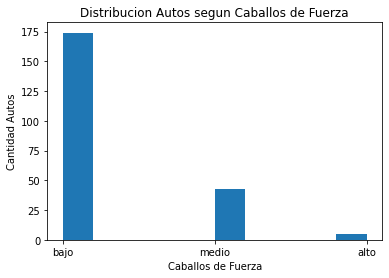

In [57]:
plt.hist(df_Autos["horsepower-bins"])
plt.xlabel("Caballos de Fuerza")
plt.ylabel("Cantidad Autos")
plt.title("Distribucion Autos segun Caballos de Fuerza")
plt.show()

In [58]:
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,horsepower-bins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556,bajo
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500,19,25,15250.0,12.368421,bajo
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,17710.0,12.368421,bajo
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,18920.0,12.368421,bajo
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140,5500,17,20,23875.0,13.823529,medio
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.50,2.80,8.8,101,5800,23,29,16430.0,10.217391,bajo


<h2 Style='color:#FFA500'>4. Visualizacion de datos</h2> 
<p> Que se hace en esta etapa?</p>
<ol>
    <li>Responder las preguntas de negocio</li>
    <li>Liberar conocimiento</li>
    <li>NGenerar informe al negocio</li>
</ol>

<h3 Style='color:#FFA500'>4.1 Responder las preguntas de negocio</h3> 

In [59]:
gf1 = df_Autos.groupby(["horsepower-bins"]).count()
gf1 = gf1.iloc[:, :1]
gf1

,symboling
horsepower-bins,
bajo,174
medio,43
alto,5


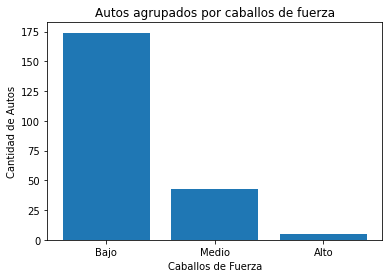

<Figure size 1080x2160 with 0 Axes>

In [60]:
eje_x = ("Bajo", "Medio", "Alto")
eje_y = gf1["symboling"].tolist()

## Creamos la grafica
plt.bar(eje_x, eje_y)

## Leyenda en el eje y
plt.ylabel("Cantidad de Autos")

## Leyenda en el eje x
plt.xlabel("Caballos de Fuerza")

## Titulo del Grafico
plt.title("Autos agrupados por caballos de fuerza")

## Ajustar tamaño del grafico
plt.figure(figsize=(15,30))
plt.show()

In [62]:
gf2 = df_Autos.groupby(["make"]).count()
gf2 = gf2.iloc[:,:1]
gf2

,symboling
make,
alfa-romero,3
audi,6
bmw,8
chevrolet,3
dodge,9
honda,13
isuzu,2
jaguar,3
mazda,17


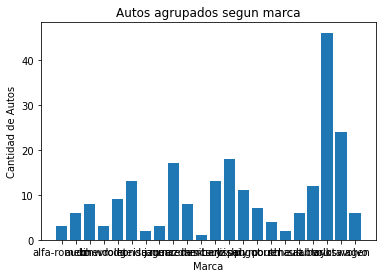

<Figure size 2160x4320 with 0 Axes>

In [63]:
eje_x = ("alfa-romero", "audi", "bmw", "chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda", "mercedes-benz", "mercury", "mitsubishi", "nissan", "peugot", "plymouth", "porsche", "renault", "saab", "subaru", "toyota", "volkswagen", "volvo")
eje_y = gf2["symboling"].tolist()

## Creamos la grafica
plt.bar(eje_x, eje_y)

## Leyenda en el eje y
plt.ylabel("Cantidad de Autos")

## Leyenda en el eje x
plt.xlabel("Marca")

## Titulo del Grafico
plt.title("Autos agrupados segun marca")

## Ajustar tamaño del grafico
plt.figure(figsize=(30,60))
plt.show()

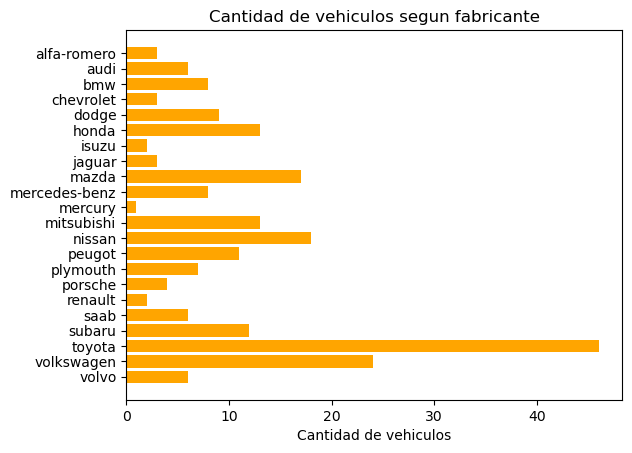

In [70]:
eje_x = ("alfa-romero", "audi", "bmw", "chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda", "mercedes-benz", "mercury", "mitsubishi", "nissan", "peugot", "plymouth", "porsche", "renault", "saab", "subaru", "toyota", "volkswagen", "volvo")
eje_y = gf2["symboling"].tolist()

plt.rcdefaults()
fig, ax = plt.subplots()

#Este se alimenta de la lista denominada eje_x

y_pos = np.arange(len(eje_x))

ax.barh(y_pos, eje_y, align='center', color = "#FFA500")
ax.set_yticks(y_pos, labels = eje_x)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cantidad de vehiculos')
ax.set_title('Cantidad de vehiculos segun fabricante')

plt.show()

In [71]:
gf3 = df_Autos.groupby(["doors"]).count()
gf3 = gf3.iloc[:,:1]
gf3

,symboling
doors,
four,125
two,97


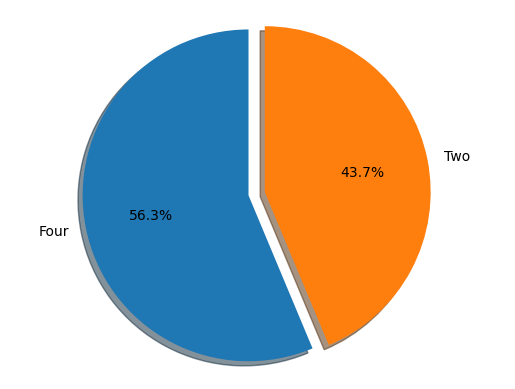

In [73]:
etiqueta = "Four", "Two"
sizes = gf3["symboling"].tolist()

separacion = (0, 0.1)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=separacion, labels = etiqueta, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis("equal")

plt.show()

In [75]:
gf4 = df_Autos.groupby(["style"]).count()
gf4 = gf4.iloc[:,:1]
gf4

,symboling
style,
convertible,8
hardtop,10
hatchback,75
sedan,103
wagon,26


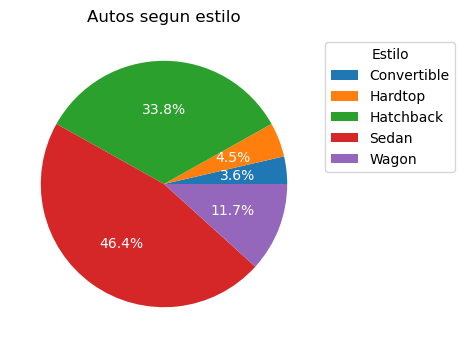

In [83]:
fig, ax = plt.subplots(figsize = (8,4), subplot_kw = dict(aspect = "equal"))

data = gf4["symboling"].tolist()
estilo = ["Convertible", "Hardtop", "Hatchback", "Sedan", "Wagon"]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexst = ax.pie(data, autopct = lambda pct: func(pct, data),   textprops=dict(color="w"))

ax.legend(wedges, estilo,
          title="Estilo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1.5))

plt.setp(autotexts, size=6, weight="bold")

ax.set_title("Autos segun estilo")

plt.show()